##### <font color=#A0A0A0>
##### ════════════════════════════════════════════════════════
#####     🦾🤖 **CREATING A NEURAL NETWORK FROM SCRATCH**
##### ════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Make a general convolutional neural network from scratch with some of the most important configurations. Implementing the convolutional layer, pooling layer, flatten layer and the dense layer to undertand the altgorithm. Then test it with different data sets and track it's performance with differents hyperparameters.

In [1]:
#import used pakages
import sys
import os
import random

if 'convolutional_net' in sys.modules:
    del sys.modules['convolutional_net']
    
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np 
from sklearn.model_selection import train_test_split
from convolutional_net import Network,ConvLayer ,PoolingLayer, FlattenLayer, DenseLayer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
# ------------- training the mnist dataset -------------------
# Preparing the train, validation and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [3]:
valid_data = (x_val, y_val)

In [ ]:
#Training the whole data in the network takes so much time to train (hours)
layers = [
    ConvLayer(kernel_size=2, filters=4, padding=0),
    PoolingLayer(2),
    FlattenLayer(),
    DenseLayer(128, activation='relu'),
    DenseLayer(10, activation='softmax')
]

model = Network(layers)
cost, accu = model.train(x_train, y_train, 10, 32, 0.1, validation_data=valid_data)

In [ ]:
layers = [
    ConvLayer(kernel_size=2, filters=4, padding=0),
    PoolingLayer(2),
    FlattenLayer(),
    DenseLayer(128, activation='relu'),
    DenseLayer(10, activation='softmax')
]

x_train = x_train[:50]
y_train = y_train[:50]
valid_data = valid_data[:50]

model = Network(layers)
cost, accu = model.train(x_train, y_train, 5, 28, 0.1, validation_data=valid_data)

Epoch 1, Loss: 0.33583896681190684
Epoch 2, Loss: 0.2902246162013991
Epoch 3, Loss: 0.2501248640013791
Epoch 4, Loss: 0.21067916828558075
Epoch 5, Loss: 0.17297992389151884


C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_18596\2348727906.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


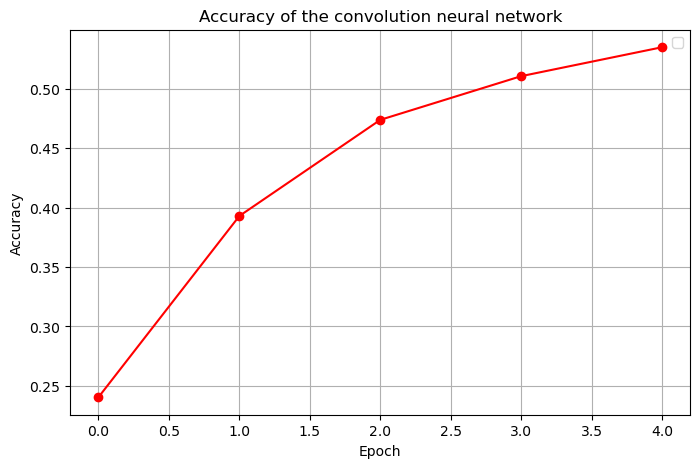

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.plot(cost, marker='o', linestyle='-', color='r', label='η = 1')
ax1.set_title('Convolutional Network Cost of mnist dataset')
ax1.set_xlabel('Cost')
ax1.set_ylabel('Cost')
ax1.legend()
ax1.grid(True)

ax2.plot(accu, marker='o', linestyle='-', color='r', label='η = 1')
ax2.set_title('Convolutional Network Accuracy of mnist dataset')
ax2.set_xlabel('Accuracy')
ax2.set_ylabel('Cost')
ax2.legend()
ax2.grid(True)
plt.savefig('../assets/TestingLearningRateSchedule.png')
plt.tight_layout()
plt.show()

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_18596\101289252.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


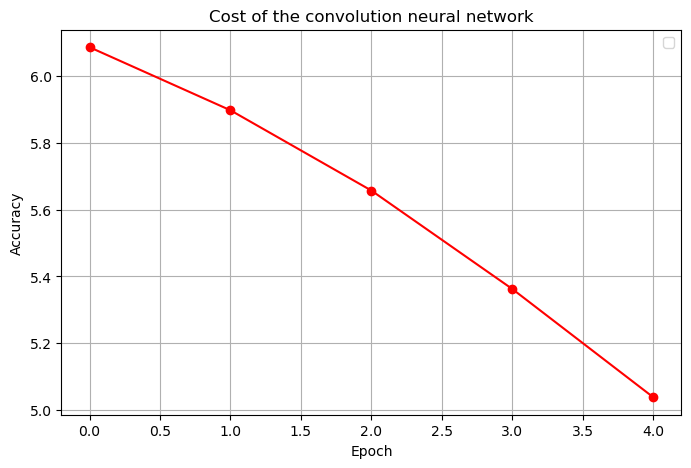

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cost, marker='o', linestyle='-', color='r')
plt.title('Cost of the convolution neural network')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The main goal was to implement the algorithm in Python using NumPym but unfortunately, training the model takes too much time due to the inefficiency of the tools used in the programming process. Therefore, from now on, the TensorFlow library will be used instead to accelerate the testing process and experiment with different hyperparameters.

In [130]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images_rnn = train_images.reshape((60000, 28*28))
train_images_rnn = train_images_rnn.astype('float32')/255
test_images_rnn = test_images.reshape((10000, 28*28))
test_images_rnn = test_images_rnn.astype('float32')/255

In [131]:
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [134]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
model_metrics1 = model.fit(train_images_rnn, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9241 - loss: 0.2660
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9689 - loss: 0.1078
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9789 - loss: 0.0704
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0512
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9885 - loss: 0.0386
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9915 - loss: 0.0294
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9939 - loss: 0.0220
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9956 - loss: 0.0165
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9966 - loss: 0.0124
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0090


In [136]:
accu_model1 = model_metrics1.history['accuracy']
loss_model1 = model_metrics1.history['loss']
idx_max_acc = np.argmax(accu_model1)
idx_min_loss = np.argmin(loss_model1)
max_acc = round(accu_model1[idx_max_acc],4)
min_loss = round(loss_model1[idx_min_loss],4)

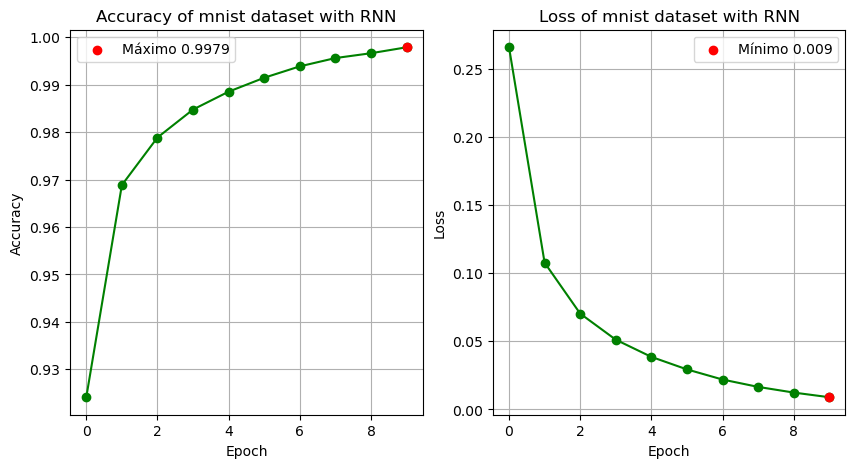

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(accu_model1, marker='o', linestyle='-', color='g')
ax1.scatter(idx_max_acc, max_acc, color="red", zorder=5, label=f"Máx {max_acc}")
ax1.set_title('Accuracy of mnist dataset with RNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(loss_model1, marker='o', linestyle='-', color='g')
ax2.scatter(idx_min_loss, min_loss, color="red", zorder=5, label=f"Mín {min_loss}")
ax2.set_title('Loss of mnist dataset with RNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

In [159]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=2, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=100, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
# x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
# x = layers.Dense(100, activation='softmax')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [160]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_metrics_conv = model.fit(train_images, train_labels, epochs=12 ,batch_size=64)

Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9025 - loss: 0.3495
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9609 - loss: 0.1283
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9702 - loss: 0.0968
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9756 - loss: 0.0797
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9793 - loss: 0.0685
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9813 - loss: 0.0604
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9836 - loss: 0.0532
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9851 - loss: 0.0486
Epoch 9/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0437
Epoch 10/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9873 - loss: 0.0404
Epoch 11/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9886 - loss: 0.0372
Epoch 12/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [161]:
accu_model_conv = model_metrics_conv.history['accuracy']
loss_model_conv = model_metrics_conv.history['loss']
idx_max_acc = np.argmax(accu_model_conv)
idx_min_loss = np.argmin(loss_model_conv)
max_acc = round(accu_model_conv[idx_max_acc],4)
min_loss = round(loss_model_conv[idx_min_loss],4)

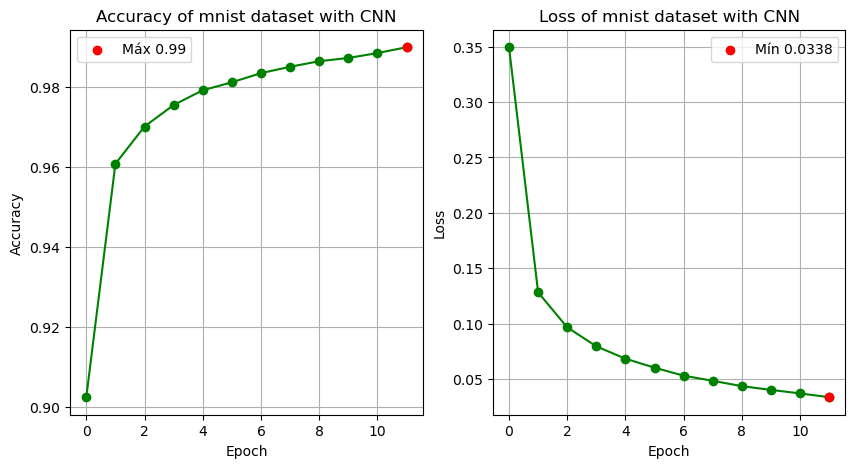

In [162]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(accu_model_conv, marker='o', linestyle='-', color='g')
ax1.scatter(idx_max_acc, max_acc, color="red", zorder=5, label=f"Máx {max_acc}")
ax1.set_title('Accuracy of mnist dataset with CNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(loss_model_conv, marker='o', linestyle='-', color='g')
ax2.scatter(idx_min_loss, min_loss, color="red", zorder=5, label=f"Mín {min_loss}")
ax2.set_title('Loss of mnist dataset with CNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

#### <font color=#A0A0A0> **🔘 Selection of hyperparameters**</font>

#### <font color=#A0A0A0> **🧐 Performance Summary**</font>

#### <font color=#A0A0A0> **🧐✅ Conclusions**</font>